<a href="https://colab.research.google.com/github/anastaseleon/Portfolio/blob/main/PF_Get_trip_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement

requiement gathering


*   Install Geotab and tools

*   Login in geotab

*   Import User  and trip data from last week

*   Explore and data clean the data


*   Create Metrics


*   Export data












##  Install Geotab and tools

In [ ]:
pip install mygeotab 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.1 MB/s eta 0:00:00


In [ ]:
pip install faker 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.9 MB/s eta 0:00:00


In [ ]:

import mygeotab
import datetime
import pandas as pd
from mygeotab import API
import re
from datetime import timedelta
from sklearn.ensemble import IsolationForest
from google.colab import files
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from faker import Faker

## Loging in  geotab

In [ ]:
api = mygeotab.API(username="DLeon@simard.ca", password="777aaa22", database="ll_transport_simard")
api.authenticate()

Credentials(username=DLeon@simard.ca, database=ll_transport_simard)

## Importing the data:


The following code retreive the driver data and the trip data for the last week( from Monday to Friday)

In [ ]:

today = datetime.datetime.now().date()

#Calculate the dates for the previous week
from_date = today - datetime.timedelta(days=today.weekday(), weeks=1)
to_date = from_date + datetime.timedelta(days=6)

params = {
    "fromDate": from_date,
    "toDate": to_date,
}

driver_data = pd.DataFrame(api.get("User", search=params))
trip_data = pd.DataFrame(api.get("Trip", search=params))


## Explore and data clean the data

Lets us createDriver Data
Trip data

In [ ]:
#here are the fields available for the drivers
driver_data.columns

Index(['driverGroups', 'keys', 'viewDriversOwnDataOnly', 'licenseProvince',
       'licenseNumber', 'acceptedEULA', 'driveGuideVersion', 'wifiEULA',
       'activeDashboardReports', 'bookmarks', 'activeFrom', 'activeTo',
       'availableDashboardReports', 'cannedResponseOptions', 'changePassword',
       'comment', 'companyGroups', 'mediaFiles', 'dateFormat', 'phoneNumber',
       'displayCurrency', 'countryCode', 'phoneNumberExtension',
       'defaultGoogleMapStyle', 'defaultMapEngine',
       'defaultOpenStreetMapStyle', 'defaultHereMapStyle', 'defaultPage',
       'designation', 'employeeNo', 'firstName', 'fuelEconomyUnit',
       'electricEnergyEconomyUnit', 'hosRuleSet', 'isYardMoveEnabled',
       'isPersonalConveyanceEnabled', 'isExemptHOSEnabled',
       'isAdverseDrivingEnabled', 'authorityName', 'authorityAddress', 'id',
       'isEULAAccepted', 'isNewsEnabled', 'isServiceUpdatesEnabled',
       'isLabsEnabled', 'isMetric', 'language', 'firstDayOfWeek', 'lastName',
       '

In [ ]:
#from the driver_data available we only need the drivers ID and their names
Drivers=driver_data[['id','lastName','firstName']]

fake = Faker()
Drivers['lastName'] = Drivers['lastName'].apply(lambda _: fake.name())
Drivers['firstName'] = Drivers['firstName'].apply(lambda _: fake.name())

<ipython-input-16-50d8567360cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Drivers['lastName'] = Drivers['lastName'].apply(lambda _: fake.name())
<ipython-input-16-50d8567360cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Drivers['firstName'] = Drivers['firstName'].apply(lambda _: fake.name())


In [1]:
Drivers

NameError: ignored

In [ ]:
#here are the fields available for the trips
trip_data.columns

Index(['afterHoursDistance', 'afterHoursDrivingDuration', 'afterHoursEnd',
       'afterHoursStart', 'afterHoursStopDuration', 'averageSpeed', 'distance',
       'drivingDuration', 'engineHours', 'idlingDuration', 'isSeatBeltOff',
       'maximumSpeed', 'nextTripStart', 'speedRange1', 'speedRange1Duration',
       'speedRange2', 'speedRange2Duration', 'speedRange3',
       'speedRange3Duration', 'start', 'stop', 'stopDuration', 'stopPoint',
       'workDistance', 'workDrivingDuration', 'workStopDuration', 'device',
       'driver', 'id'],
      dtype='object')

In [ ]:
#creating the Trip dataframe from  key columns from the trip_data
Trips=trip_data[['id','start','stop','stopDuration', 'driver','averageSpeed','distance',"drivingDuration"]]
#since we already have a column named ID, we will change the Trip id column name 
Trips['trip_id']=Trips['id']
Trips=Trips.drop('id',axis=1)


<ipython-input-19-073fcb16e525>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips['trip_id']=Trips['id']


In [ ]:
Trips.head()
# the driver  column contains a dictionnary with hte driver ID and a boolean variable stating if the user is a driver or not

,start,stop,stopDuration,driver,averageSpeed,distance,drivingDuration,trip_id
0,2023-04-23 23:59:02+00:00,2023-04-24 00:00:06+00:00,00:20:20,"{'id': 'b294', 'isDriver': True}",1.768679,0.031443,00:01:04,b271B3CA
1,2023-04-24 00:05:06.063000+00:00,2023-04-24 00:05:18+00:00,00:35:31.063000,"{'id': 'b28B', 'isDriver': True}",9.123765,0.030253,00:00:11.937000,b271B571
2,2023-04-24 00:09:08.127000+00:00,2023-04-24 00:12:40+00:00,00:15:17,"{'id': 'b268', 'isDriver': True}",1.775867,0.104516,00:03:31.873000,b271B473
3,2023-04-23 23:21:31.063000+00:00,2023-04-24 00:32:47+00:00,00:08:57,"{'id': 'b261', 'isDriver': True}",78.006645,92.653190,01:11:15.937000,b271B5B2
4,2023-04-24 00:37:25.063000+00:00,2023-04-24 00:41:35+00:00,00:04:32.127000,UnknownDriverId,11.740127,0.815081,00:04:09.937000,b271B614


Fix the dictionary format in the driver column

In [ ]:
# to fix the dictionary issue:

# Expand the 'Driver' column (dictionary) into separate columns
expanded_driver = Trips["driver"].apply(pd.Series)

# Merge the expanded columns back into the original DataFrame
Trips = pd.concat([Trips.drop("driver", axis=1), expanded_driver], axis=1)



In [ ]:
# new trip data
Trips.head()

,start,stop,stopDuration,averageSpeed,distance,drivingDuration,trip_id,id,isDriver,0
0,2023-04-23 23:59:02+00:00,2023-04-24 00:00:06+00:00,00:20:20,1.768679,0.031443,00:01:04,b271B3CA,b294,True,NaN
1,2023-04-24 00:05:06.063000+00:00,2023-04-24 00:05:18+00:00,00:35:31.063000,9.123765,0.030253,00:00:11.937000,b271B571,b28B,True,NaN
2,2023-04-24 00:09:08.127000+00:00,2023-04-24 00:12:40+00:00,00:15:17,1.775867,0.104516,00:03:31.873000,b271B473,b268,True,NaN
3,2023-04-23 23:21:31.063000+00:00,2023-04-24 00:32:47+00:00,00:08:57,78.006645,92.653190,01:11:15.937000,b271B5B2,b261,True,NaN
4,2023-04-24 00:37:25.063000+00:00,2023-04-24 00:41:35+00:00,00:04:32.127000,11.740127,0.815081,00:04:09.937000,b271B614,NaN,NaN,UnknownDriverId


Functions to deal with format issues

In [ ]:
def format_timedelta(timedelta):
  # this fonction tranform the timedelta in hour, minutes format
    hours = timedelta.seconds // 3600
    minutes = (timedelta.seconds // 60) % 60
    formatted_duration = "{:02d}:{:02d}".format(hours, minutes)
    return formatted_duration

In [ ]:
def parse_duration(duration_str):
  #this function transform a text into day, hours, minute and seconds
    days, hours, minutes, seconds = 0, 0, 0, 0
    
    match = re.match(r'(\d+)\.(\d+):(\d+):(\d+)', duration_str)
    if match:
        days, hours, minutes, seconds = map(int, match.groups())
    else:
        match = re.match(r'(\d+):(\d+):(\d+)', duration_str)
        if match:
            hours, minutes, seconds = map(int, match.groups())
    
    return timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)


In [ ]:
# Convert the 'start' and 'stop' columns to Timestamp objects
Trips["start"] = pd.to_datetime(Trips["start"])
Trips["stop"] = pd.to_datetime(Trips["stop"])


#convert the driving duration into number of hours
Trips["drivingDuration"] = Trips["drivingDuration"].astype(str)


Trips["drivingDuration"] = (Trips["drivingDuration"].apply(parse_duration))
Trips["hours driving"] = Trips["drivingDuration"].dt.total_seconds()/3600

In [ ]:



# Extract the date and time components into separate columns
Trips['start_date'] = Trips['start'].dt.date
Trips['start_time'] = Trips['start'].dt.time
Trips['stop_date'] = Trips['stop'].dt.date
Trips['stop_time'] = Trips['stop'].dt.time

 , Sumarize trips and merge with the driver data 

*   Create the final data frame  as a summary of the Trips groupped by ID (driver) and by start date

*  Since we can have multiple trips in one day, for each driver and each date, we take the maximum of the trip ending time (top_time) and the minimum of  trip staring time (start_time)

*   all the trips distance , driving and stoping time of each date are added
*   we calculate te average spead per date
*  Usind the driver ID, we looked up the driver first and last name



In [ ]:
summary_trips = Trips.groupby(["id",Trips["start_date"]]).agg({'stop_time': 'max', 'start_time': 'min','stop': 'max', 'start': 'min', "distance" : "sum" ,"averageSpeed": "mean", 'trip_id': "count",'hours driving':"sum"}).reset_index()
summary_trips= pd.merge(summary_trips, Drivers, on="id")

## Create new  metrics:
*   work_day: the amount of time worked 


*   Hours stopped: since drivers can start as many trips has they want, we can not use the stop duration variables provided by geotab. Therefore             the number of hours stopped is simply the diffference of work day and drivring duration

*  score distance/stop' : the distance driven/ hours stopped . The 
*   score drive/day: the driving duration / work day
*   








In [ ]:
summary_trips["work_day"]=((summary_trips["stop"]-summary_trips["start"])).dt.total_seconds()/3600

In [ ]:


summary_trips["Hours stopped"]=summary_trips["work_day"]-summary_trips["hours driving"]


summary_trips['score drive/day']=summary_trips["hours driving"]/summary_trips['work_day']




#Final summary
summary_trips=summary_trips[['lastName', 'firstName', 'start_date','stop_time', 'start_time','work_day',  'distance','averageSpeed',
       'score drive/day', 'hours driving','Hours stopped',]]



## Analyzing the final data frame

To get a better understanding of the fleet behavior and analyse driving patern we will segment the drivers and categories.


In the next steps we will:

*   Standardize the numerical data : this will put all the metrics on a similar scale so we can compare them together
*   Apply the clustering algorithm
*  Analyze the metrics vis-à-vis the clusters






In [ ]:
#for now lets drop the non numerical data
X= summary_trips.drop(['lastName', 'firstName','start_time','stop_time','start_date','work_day'], axis= 1)
#saving the columns names 
X_columns=X.columns
#replace infintity (it might add some noise)
X = X.replace(np.inf, 0)

In [ ]:
X_columns

Index(['distance', 'averageSpeed', 'score drive/day', 'hours driving',
       'Hours stopped'],
      dtype='object')

We juste created a data frame name X that contains all our numerical variable that will be used to categorize the drivers : the distance, the  averageSpeed, 
       hours driving, Hours stopped and the 2 metrics (score distance/stop, score drive/day)

  In the nex line we will standardize the data so they can be comparable 

In [ ]:


X = StandardScaler().fit_transform(X)


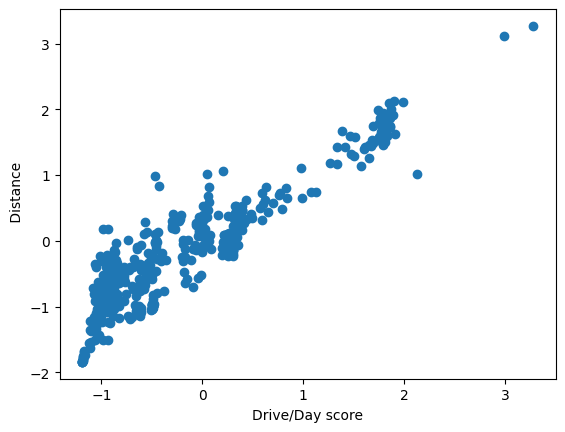

In [ ]:
# here is an example of 2 variables compared togeter. distance and the drivingtime per workday score
plt.scatter(X[:, 0], X[:, 3])

# Set the labels for the x and y axes
plt.xlabel("Drive/Day score")
plt.ylabel(" Distance")

# Display the plot
plt.show()

Apply the dbscan algorithm to the data
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that helps to group similar data points based on their proximity to each other and their density. It is particularly useful for detecting clusters of arbitrary shapes and dealing with noisy datasets.

The result will be multiple categorie of driver and some noise data. The noise are data that are not classified in any categories. they might indicate unusasual behavior but are can be false alarms

In [ ]:


db = DBSCAN(eps=0.7, min_samples=2).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 16


After applying the algorithm , we have 6 Clusters and 18 noise points ( noise points are the black dots)

 

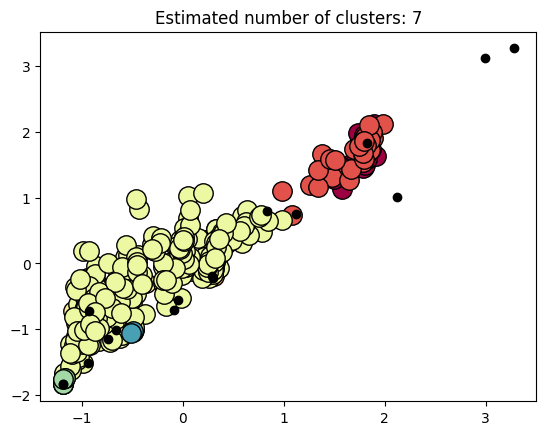

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 3],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 3],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

The cluster labels (-1 to 7) are saved an plugged back to our data frame

In [ ]:
summary_trips['cluster']=labels
summary_trips

,lastName,firstName,start_date,stop_time,start_time,work_day,distance,averageSpeed,score drive/day,hours driving,Hours stopped,cluster
0,Lisa Robinson,Paula Martinez,2023-04-24,22:59:06,10:35:58,12.385556,1105.786365,47.069327,0.946308,11.720556,0.665000,0
1,Lisa Robinson,Paula Martinez,2023-04-25,22:21:26,10:00:48,12.343889,1105.790802,51.235108,0.967528,11.943056,0.400833,0
2,Lisa Robinson,Paula Martinez,2023-04-26,22:12:34,09:56:20,12.270556,1102.010509,50.734986,0.964368,11.833333,0.437222,0
3,Lisa Robinson,Paula Martinez,2023-04-27,23:06:42,09:59:57,13.112500,1104.760464,46.677479,0.940028,12.326111,0.786389,0
4,Lisa Robinson,Paula Martinez,2023-04-28,22:07:25,09:57:37,12.163333,1102.755282,46.736978,0.959532,11.671111,0.492222,0
...,...,...,...,...,...,...,...,...,...,...,...,...
482,Sara Miller,Valerie Dyer,2023-04-25,20:02:51,09:45:12,10.294167,575.192564,32.187043,0.763593,7.860556,2.433611,4
483,Sara Miller,Valerie Dyer,2023-04-26,19:52:01,09:48:21,10.061111,367.068698,32.090860,0.561734,5.651667,4.409444,4
484,Sara Miller,Valerie Dyer,2023-04-27,16:50:33,09:53:07,6.957222,117.638036,17.948818,0.414677,2.885000,4.072222,4
485,Sara Miller,Valerie Dyer,2023-04-28,19:22:03,09:53:29,9.476111,378.981096,25.022138,0.597086,5.658056,3.818056,4


Most trips are in cluster 4

cluster 3 has the lowest productivity

cluster 0 has the highest

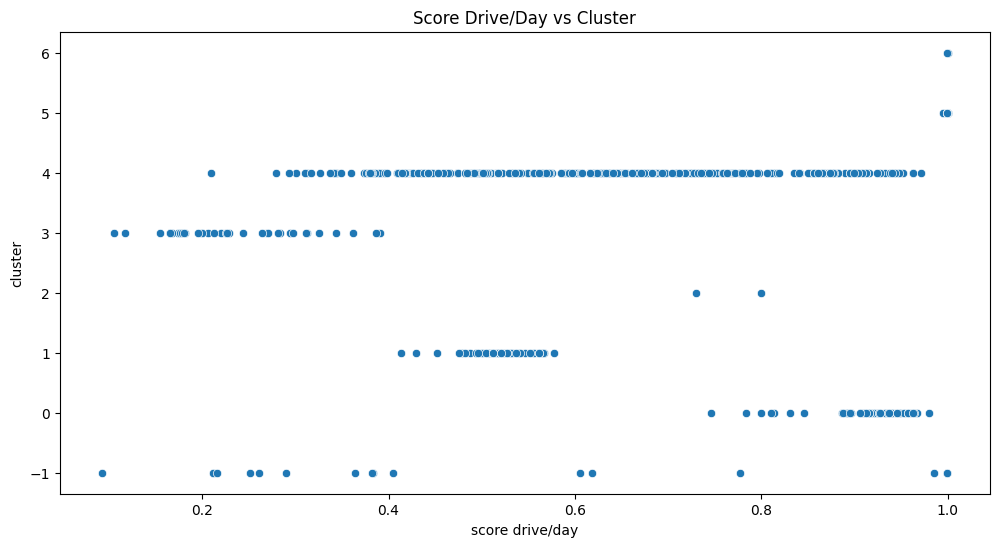

In [ ]:

fig, ax1 = plt.subplots(1,figsize=(12, 6))


sns.scatterplot(data=summary_trips, x='score drive/day', y='cluster', ax=ax1)
ax1.set_title("Score Drive/Day vs Cluster")


# Show the plots
plt.show()

## Use the clusters to understand behaviors

We can use the table bellow to understand the cbehaviors better and chose our KPI and goals

The graph bellow should change based on the weeks, but i included an example interpretation further down

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

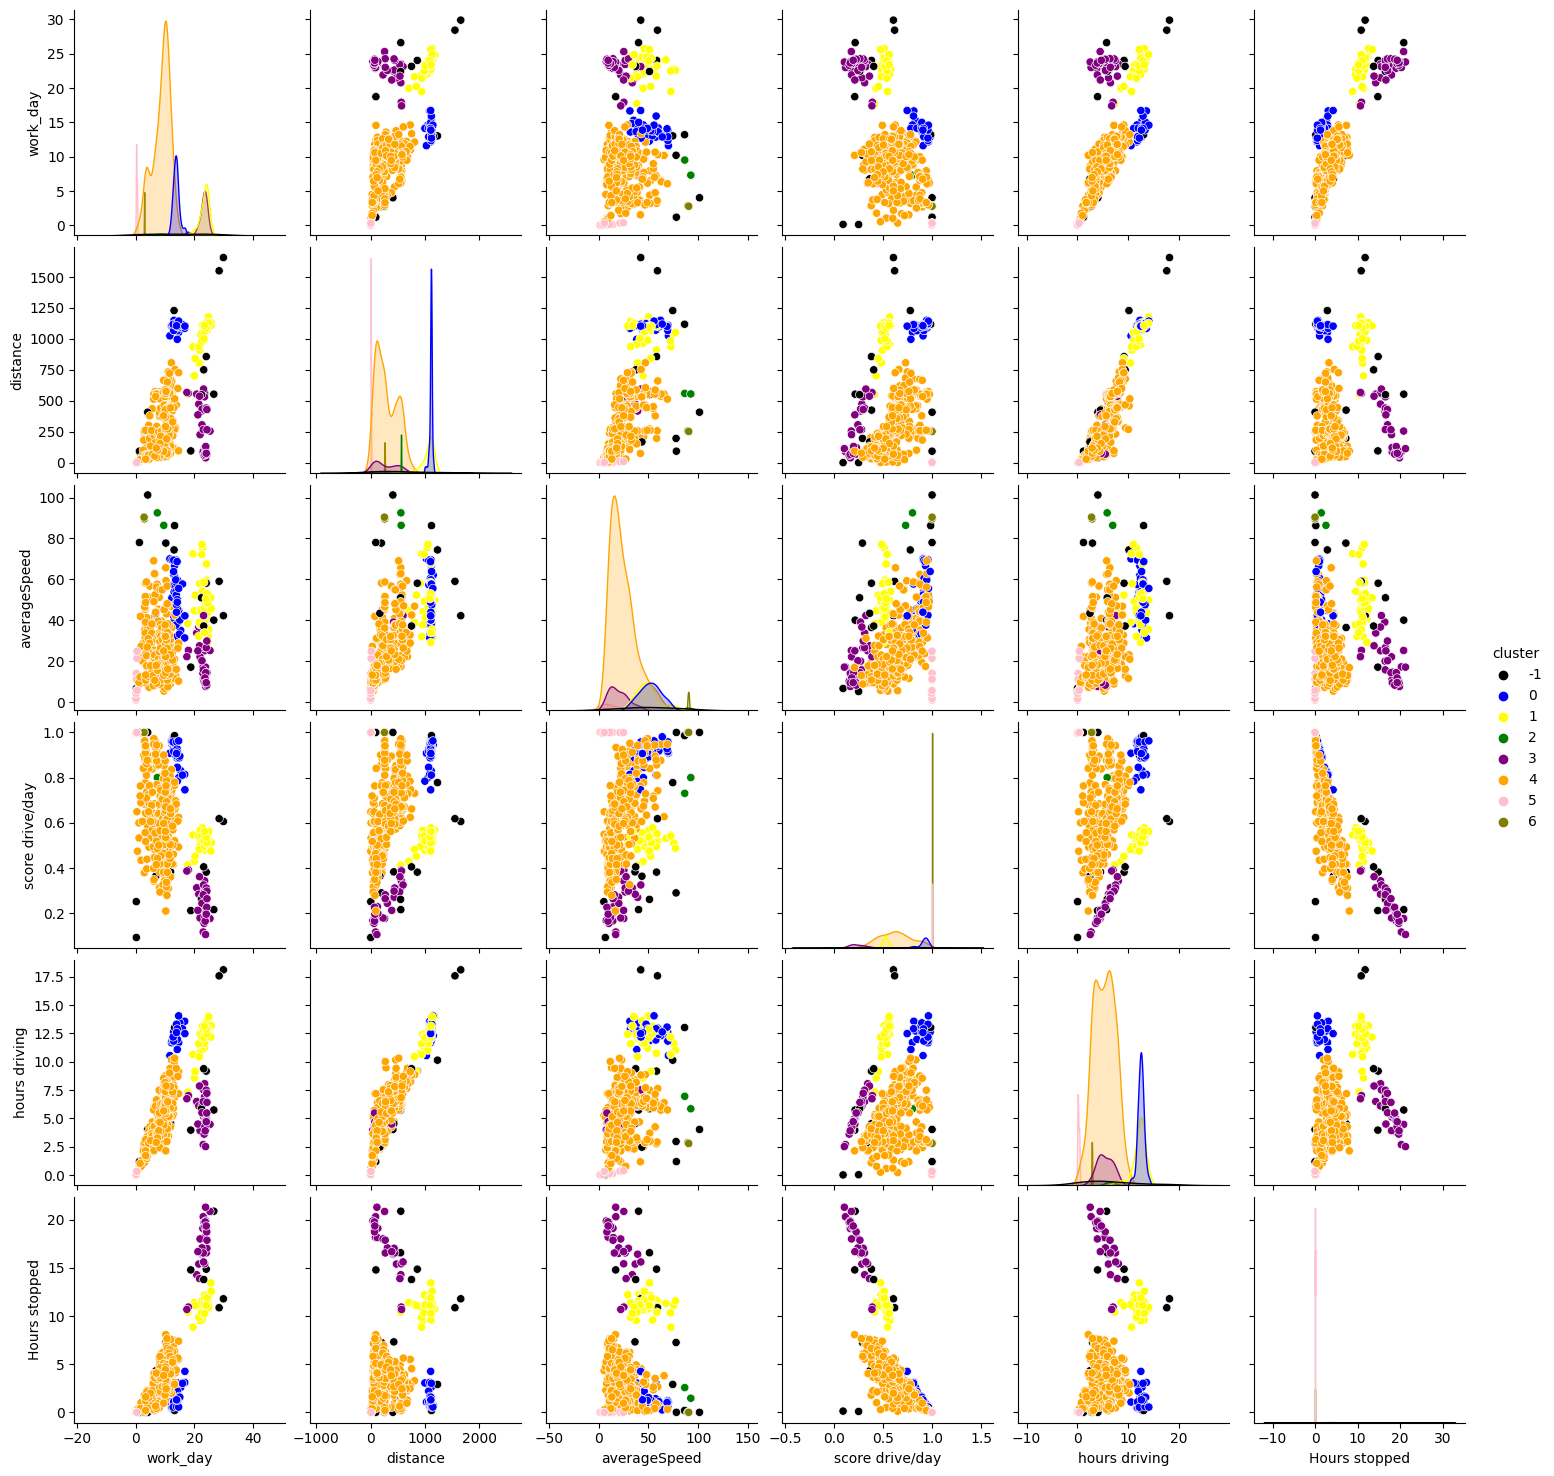

In [ ]:


black='#000000'
yellow = "#FFFF00"
blue = "#0000FF"
grey = "#808080"
green = "#00FF00"
purple = "#800080"
orange = "#FFA500"
pink='#FFC0CB'
olive ='##787D12'
sns.pairplot(summary_trips, hue='cluster', palette=['black', 'blue', 'yellow', 'green', 'purple', 'orange','pink','olive','grey'])
plt.show()


In [ ]:
#export the table
filtered_trips = summary_trips[summary_trips["work_day"] > 4].sort_values("cluster")
filtered_trips.to_csv('output.csv', encoding='utf-8-sig', index=False)
files.download('output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Interpretation

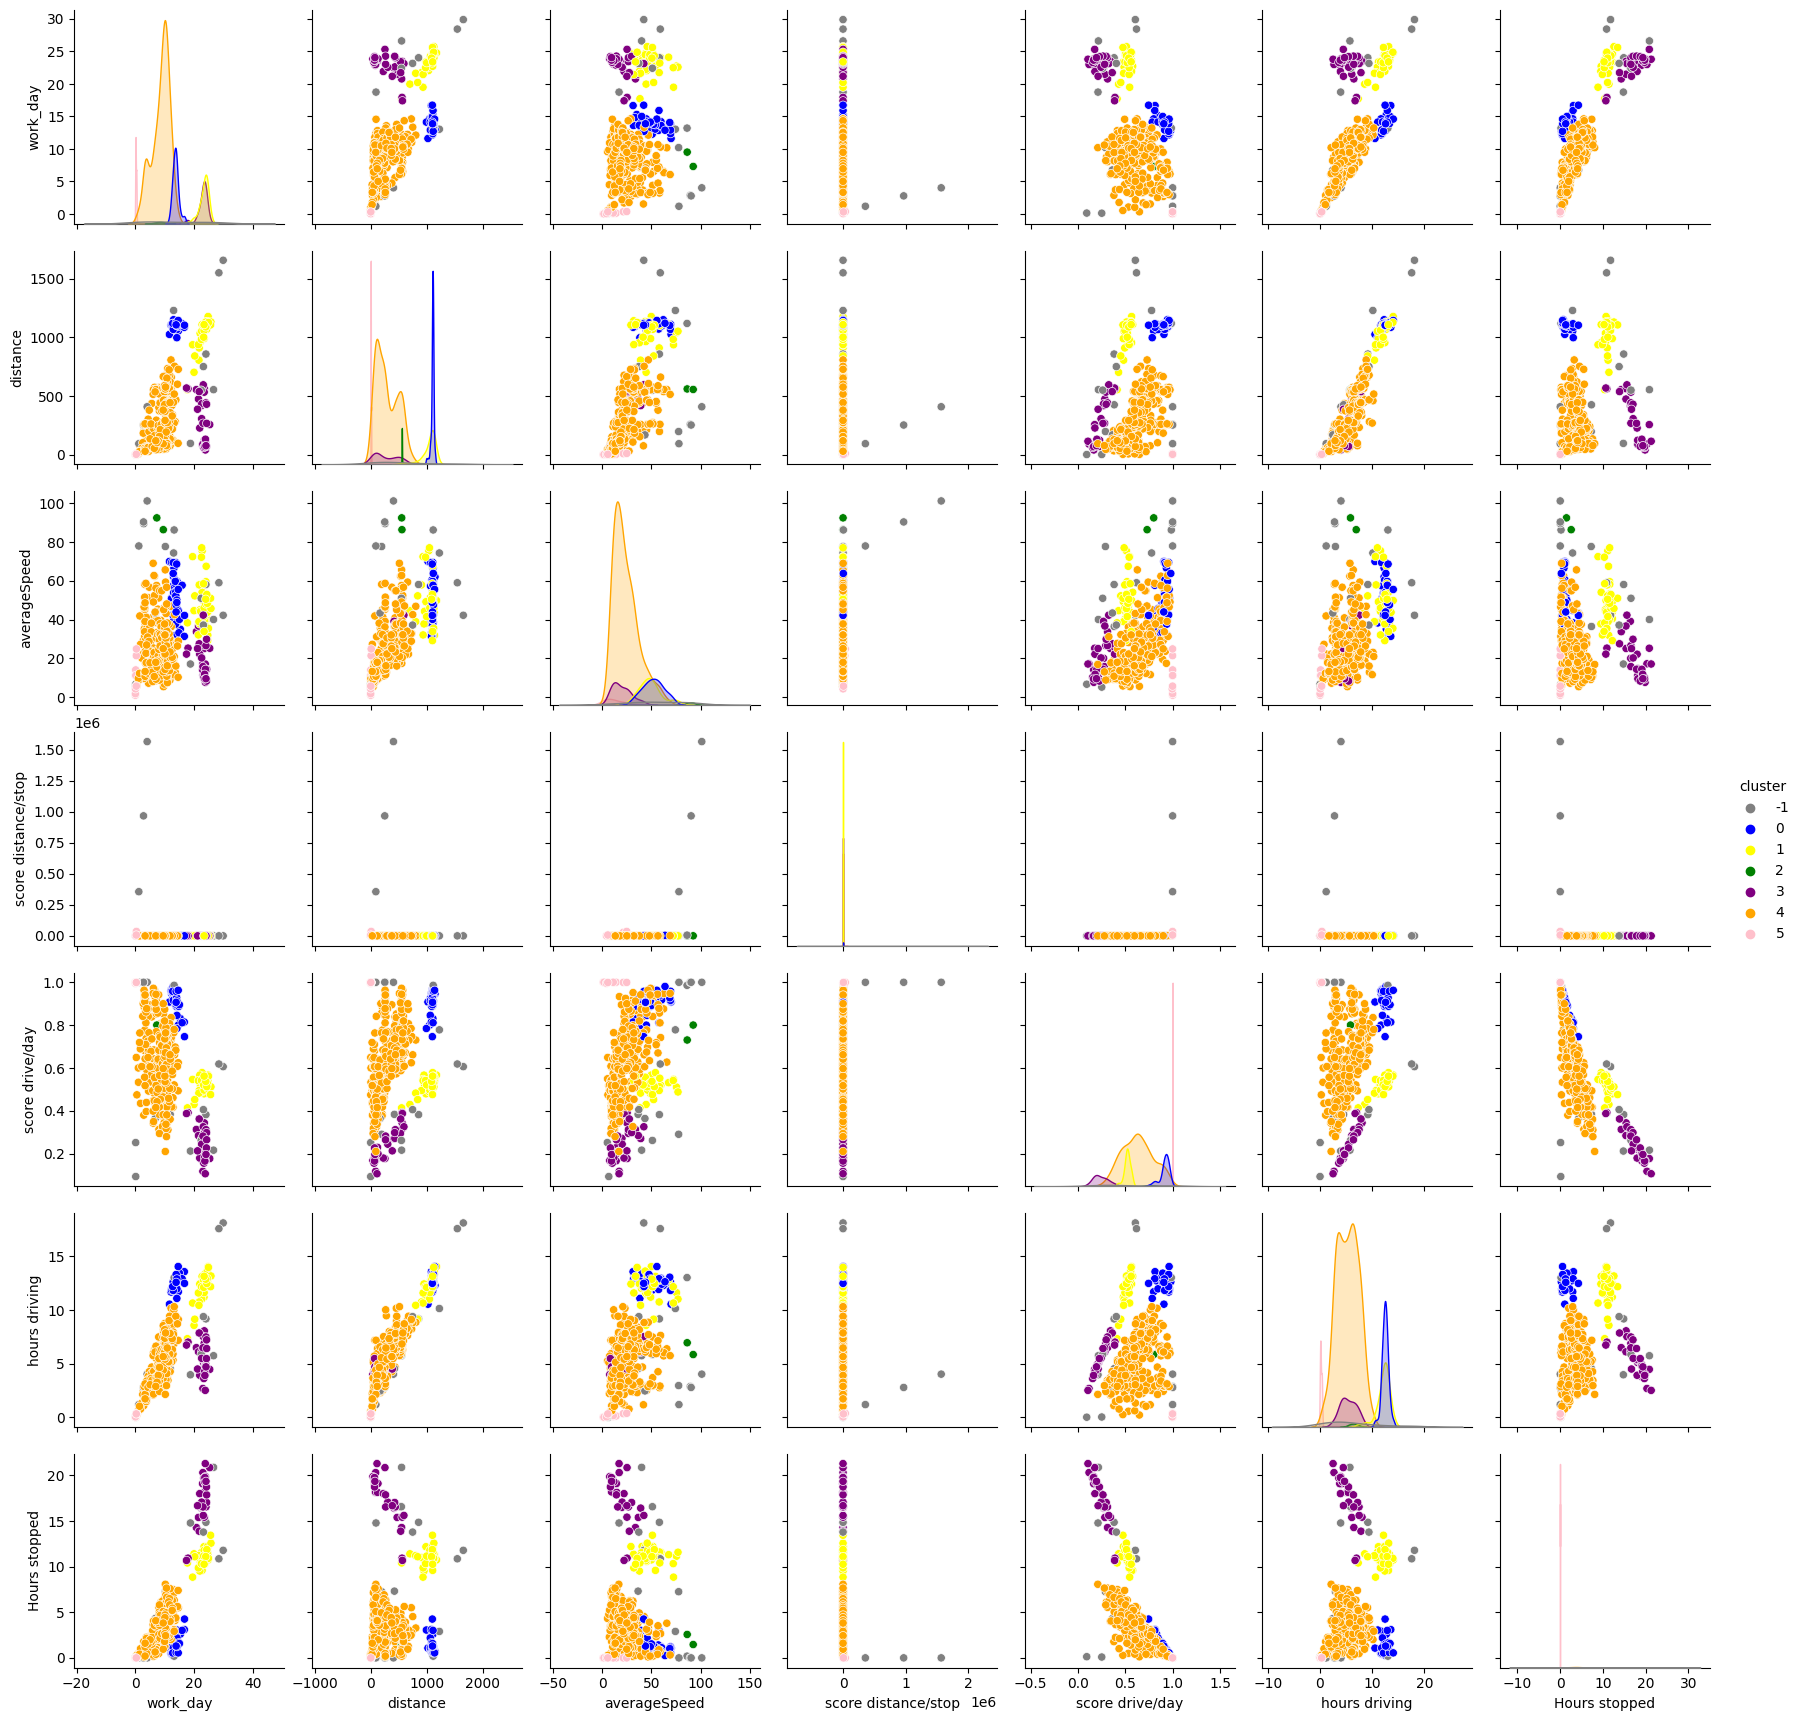

In the figure above:

The gray are the noise and the other colors are the clusters.


Worday: 
The Orange cluster #3  = Majority of the trips , these seem to beregular trips 
 They seems to be regular work days from 4 to 13 hours a day ;
 Distance is  under 1000 km per day, average spead around 50 km/h; driving/scores is around 0.5,
 And the  hours spent driving and stop is poistively corelated to the length of their work day 


  On the other hand the puple  trips , #1 look problematic:
 The work days are comparatively high, while the distance and speed are low, they have low driving hours and  high stopped hours


### Possible Next steps


Improve the data in  Geotab:

It looks like 




